# **Project 4 : Bike Rental Analysis**

## **Table of Contents**
<ul>
<li><a href="#Introduction">Introduction</a></li>
<li><a href="#Preliminary Wrangling">Preliminary Wrangling</a></li>
<li><a href="#Visualization">Visualization</a></li>
<li><a href="#Conclusion">Conclusion</a></li>
</ul>

<a id='Introduction'></a>

## **Introduction**
 For this project, I will be analyzing data from the Ford GoBike System, a shared bicycle system in the San Francisco Bay Area. While it is not directly stated what the rate is, it is assumed that the rental time is directly related to the rate, and that other factors are related to the rental time. Therefore, I will focus my analysis on the factors related to the rental time.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# Load the data.
bike_rental = pd.read_csv('fordgobike-tripdata.csv')
bike_rental.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
print(bike_rental.shape)
print(bike_rental.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


<a id='Preliminary Wrangling'></a>

## **Preliminary Wrangling**

### Remove duplicate data

In [4]:
# Check for duplicate values.
bike_rental.duplicated().sum()

0

No duplicate values were found.

### Remove missing values

In [5]:
# Check for missing values.
bike_rental.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# Remove rows with missing values.
bike_rental.dropna(inplace=True)
bike_rental.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

### Change data type

In [7]:
# Convert the data types of start_time and end_time to datetime.
bike_rental['start_time'] = pd.to_datetime(bike_rental['start_time'])
bike_rental['end_time'] = pd.to_datetime(bike_rental['end_time'])
# Convert the data types of start_station_id, end_station_id, and member_birth_year to int.
bike_rental['start_station_id'] = bike_rental['start_station_id'].astype(int)
bike_rental['end_station_id'] = bike_rental['end_station_id'].astype(int)
bike_rental['member_birth_year'] = bike_rental['member_birth_year'].astype(int)
# Convert the data types of user_type, member_gender, and bike_share_for_all_trip to category.
bike_rental['user_type'] = bike_rental['user_type'].astype('category')
bike_rental['member_gender'] = bike_rental['member_gender'].astype('category')
bike_rental['bike_share_for_all_trip'] = bike_rental['bike_share_for_all_trip'].astype('category')
bike_rental.dtypes


duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int32
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int32
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                   int32
member_gender                    category
bike_share_for_all_trip          category
dtype: object

What is the structure of your dataset?

- The dataset has a structure of 183412 rows × 16 columns.

What is/are the main feature(s) of interest in your dataset?

- I expect duration_sec to be the main feature because there will probably be a rental fee.

What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- We expect time of day, month of rental, user type, age (year of birth), and gender to be relevant.
- I'm not sure about bike_share_for_all_trip, but I'll check and get back to you.
- It would be perfect if we could calculate the day of the week, add geo data for the location of the rental and return, and weather data. 

<a id='Visualization'></a>

## **Visualization**

## Univariate Exploration
In univariate exploration, we'll start with the main feature, duration_sec, and look at the distribution of the other variables to see if there's anything unusual. If the graph isn't appropriate, we'll change it to one that is.

### duration_sec histogram

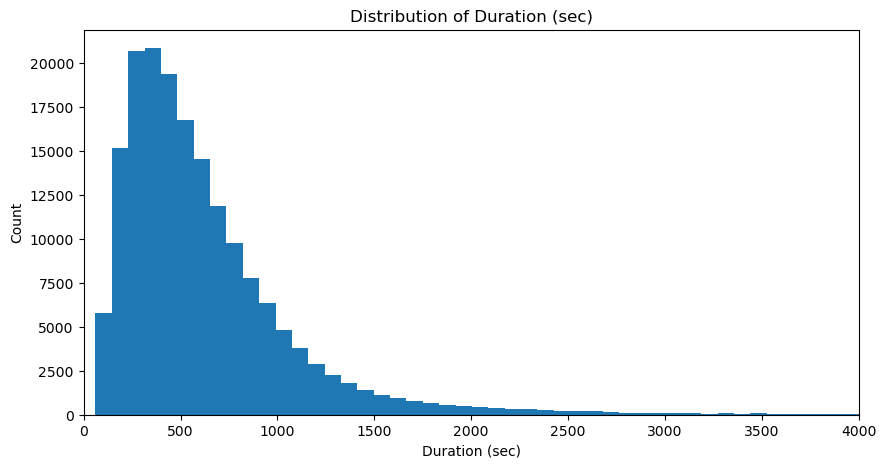

In [8]:
# plot a histogram of the distribution of duration_sec.
plt.figure(figsize=(10, 5))
plt.hist(data=bike_rental, x='duration_sec', bins=1000)
plt.xlim(0, 4000)
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.title('Distribution of Duration (sec)')
plt.show()

We can see that many people get on and off in about 500 seconds. The graph is skewed significantly to the right, so we apply a logarithmic transformation.

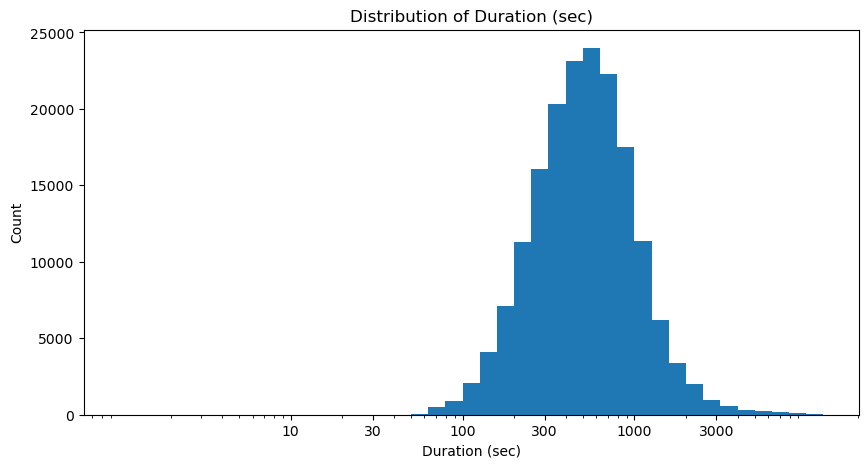

In [9]:
# Log-transform the distribution of duration_sec and plot it as a histogram. Scale the x-axis appropriately.
plt.figure(figsize=(10, 5))
bins = 10 ** np.arange(0, 4.1+0.1, 0.1)
plt.hist(data=bike_rental, x='duration_sec', bins=bins)
plt.xscale('log')
plt.xticks([10, 30, 100, 300, 1000, 3000], [10, 30, 100, 300, 1000, 3000])
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.title('Distribution of Duration (sec)')
plt.show()

It looks like a normal distribution.

### Histogram of time rented (start_time)

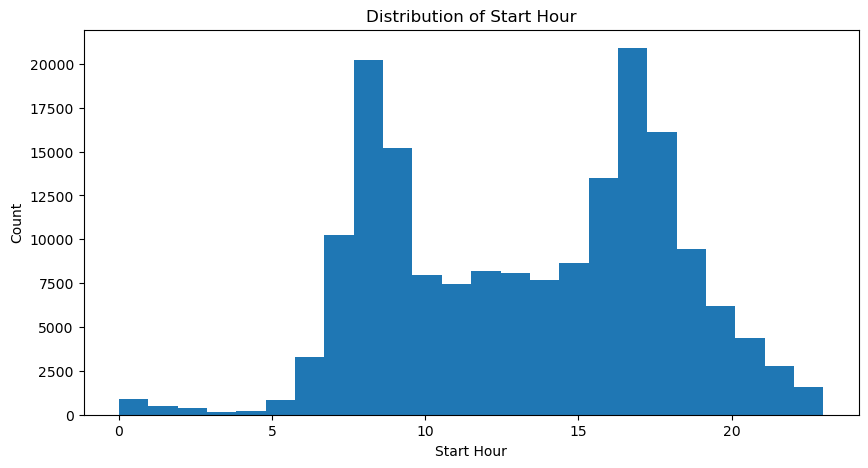

In [10]:
# Create a start_hour column by extracting only the hour from start_time.
bike_rental['start_hour'] = bike_rental['start_time'].dt.hour
# plot a histogram of the distribution of start_hour.
plt.figure(figsize=(10, 5))
plt.hist(data=bike_rental, x='start_hour', bins=24)
plt.xlabel('Start Hour')
plt.ylabel('Count')
plt.title('Distribution of Start Hour')
plt.show()

8:00 to 9:00 and 17:00 to 18:00 seem to be the most popular times for people to bike.

### Histogram of months rented

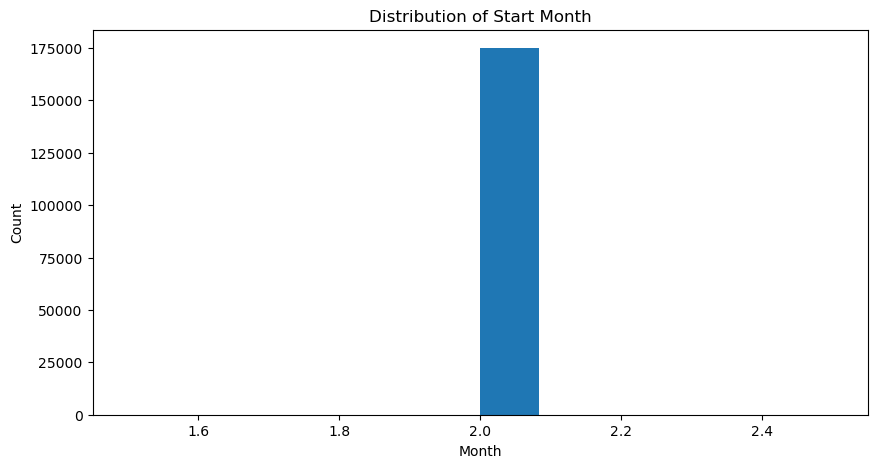

In [11]:
# Create a start_month column by extracting only the month from start_time.
bike_rental['start_month'] = bike_rental['start_time'].dt.month
# plot a histogram of the distribution of start_month.
plt.figure(figsize=(10, 5))
plt.hist(data=bike_rental, x='start_month', bins=12)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Start Month')
plt.show()

Oops, we only have February data, so the monthly distribution is meaningless due to lack of data.

### UserType Countplot

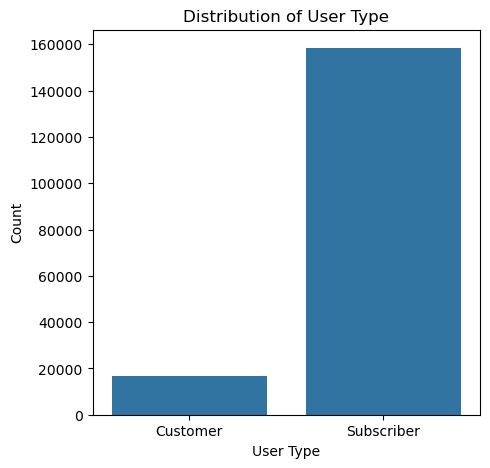

In [12]:
# Plot the distribution of user_type as a bar graph.
plt.figure(figsize=(5, 5))
sb.countplot(data=bike_rental, x='user_type', color=sb.color_palette()[0])
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Distribution of User Type')
plt.show()

We have about eight times as many subscribers.

### Age histogram
After plotting a histogram with birth years, we'll calculate the difference in birth dates to get the age and plot it as a histogram. We'll calculate ages based on the time of our data, 2019.

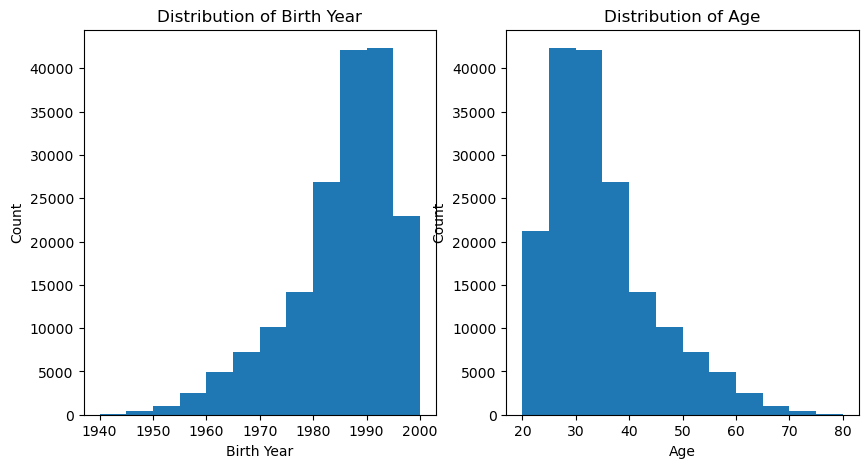

In [13]:
# Plot the birth year distribution histogram and the age distribution histogram in parallel.
# Graph 1 - Birth year distribution histogram, position: row 1, column 2, line 1
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
bins = np.arange(1940, 2001+1, 5)
plt.hist(data=bike_rental, x='member_birth_year', bins=bins)
plt.xlabel('Birth Year')
plt.ylabel('Count')
plt.title('Distribution of Birth Year')
# Graph 2 - Age distribution histogram, location: row 1, column 2, number 2
# Create a column with the age calculated using the year of birth (as of 2019).
bike_rental['member_age'] = 2019 - bike_rental['member_birth_year']
plt.subplot(1, 2, 2)
bins = np.arange(20, 80+5, 5)
plt.hist(data=bike_rental, x='member_age', bins=bins)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

The year of birth plots are skewed to the left, and unsurprisingly, the age plots are skewed to the right. Younger people seem to be using bicycles more.

### Gender Countplot

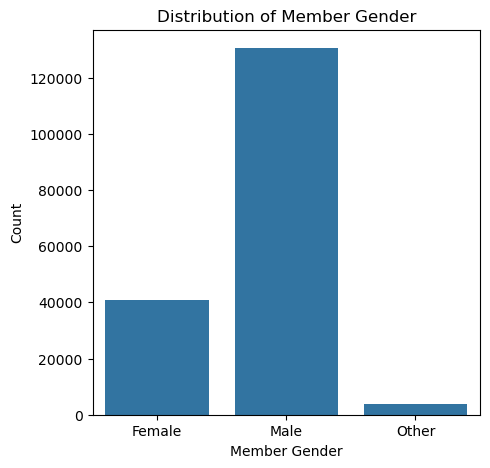

In [14]:
# Plot the distribution of member_gender as a bar graph.
plt.figure(figsize=(5, 5))
sb.countplot(data=bike_rental, x='member_gender', color=sb.color_palette()[0])
plt.xlabel('Member Gender')
plt.ylabel('Count')
plt.title('Distribution of Member Gender')
plt.show()

Men are more than three times as likely as women.

### bike_share_for_all_trip Countplot

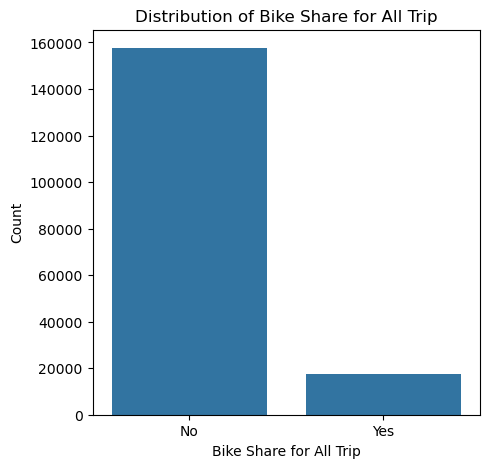

In [15]:
# Plot the distribution of bike_share_for_all_trip as a bar graph.
plt.figure(figsize=(5, 5))
sb.countplot(data=bike_rental, x='bike_share_for_all_trip', color=sb.color_palette()[0])
plt.xlabel('Bike Share for All Trip')
plt.ylabel('Count')
plt.title('Distribution of Bike Share for All Trip')
plt.show()

## Bivariate Exploration
First, let's look at the correlation between the features in each piece of data. For numeric data, we'll calculate the correlation and plot a heatmap and scatterplot. For categorical data, we'll look at the relationship with duration_sec.

### Numerical data correlation
#### Heatmaps and scatterplots

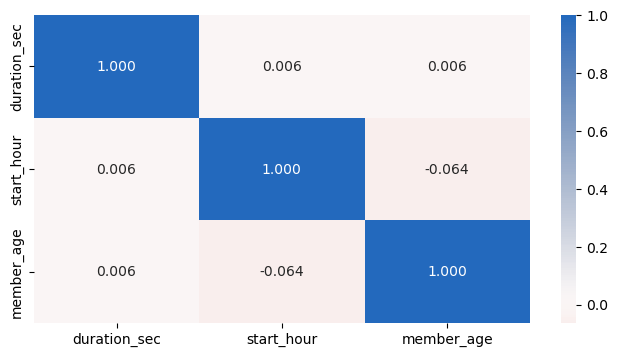

In [16]:
# Store the numeric and categorical feature columns in a list. (Exclude month because it's only February, and exclude birth year because it's the same as age).
num_cols = ['duration_sec', 'start_hour', 'member_age']
category_cols = ['user_type', 'member_gender', 'bike_share_for_all_trip']

# Plot the correlation of the numeric feature columns as a heatmap (outputting each category letter horizontally).
plt.figure(figsize=(8, 4))
sb.heatmap(bike_rental[num_cols].corr(), annot=True, fmt='.3f', cmap='vlag_r', center=0)
plt.show()

<Figure size 1000x1000 with 0 Axes>

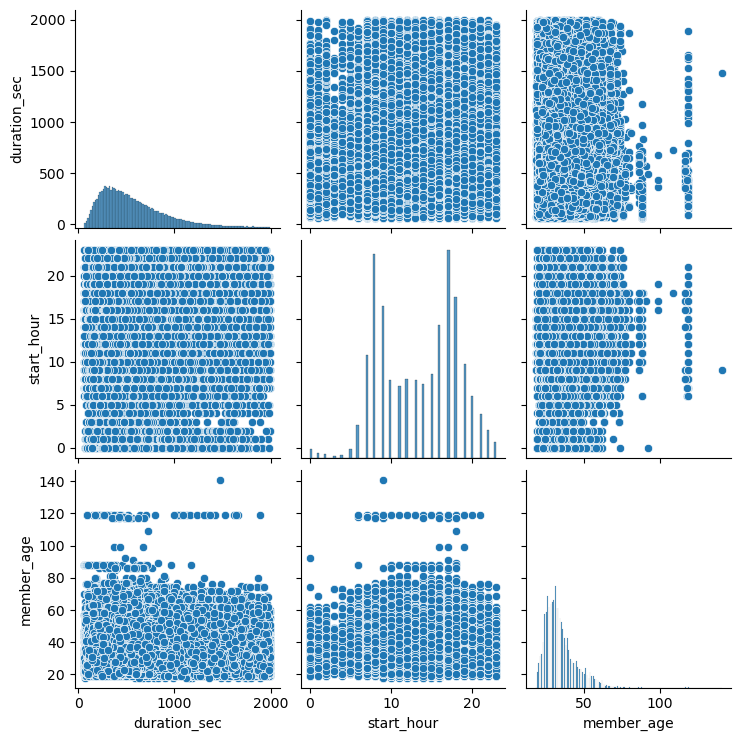

In [17]:
# Plot the correlation of the numerical feature columns as a scatterplot matrix, excluding data with values of duration_sec > 2000 seconds.
plt.figure(figsize=(10, 10))
sb.pairplot(bike_rental[num_cols][bike_rental['duration_sec'] < 2000], diag_kind='hist')
plt.show()

I didn't notice it in the previous plot, but I see a lot of data with memeber_age over 100. It looks like an outlier, so I'll remove it and redraw it.

<Figure size 1000x1000 with 0 Axes>

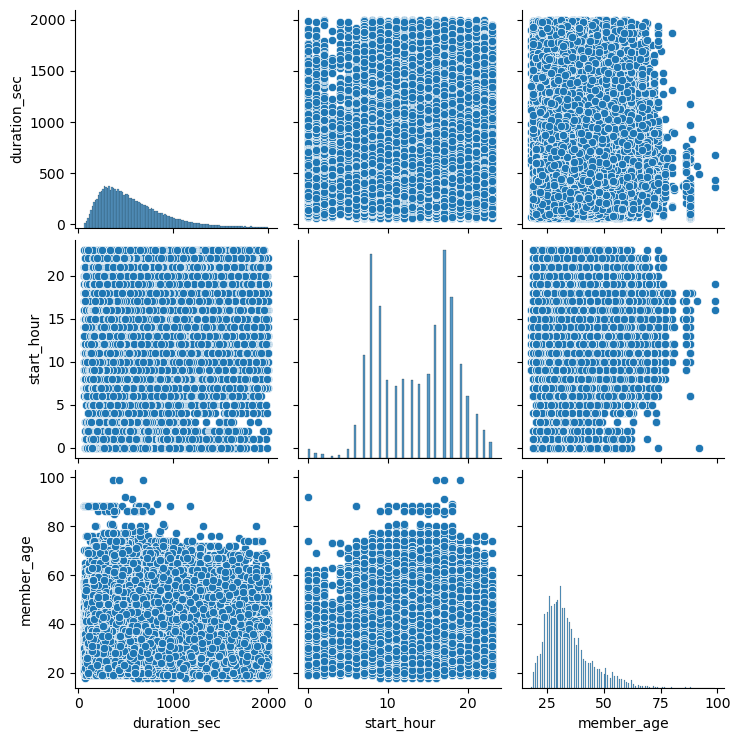

In [18]:
# Remove data with member_age > 100.
bike_rental = bike_rental[bike_rental['member_age'] < 100]
# Again, plot the correlation of the numerical feature columns as a scatterplot matrix.
plt.figure(figsize=(10, 10))
sb.pairplot(bike_rental[num_cols][bike_rental['duration_sec'] < 2000], diag_kind='hist')
plt.show()

Based on our observations, there doesn't seem to be any significant correlation. However, it is difficult to observe the frequency of values in a scatterplot, so let's plot a heatmap.

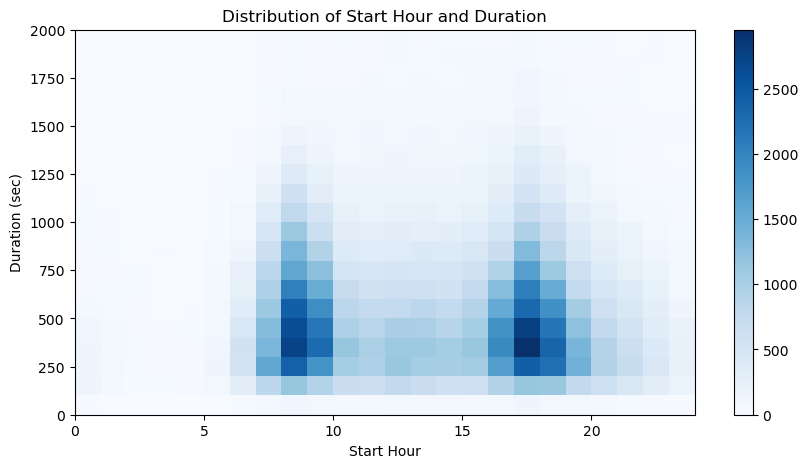

In [19]:
# Draw a heatmap with start_hour as the x-axis and duration_sec as the y-axis.
plt.figure(figsize=(10, 5))
bins_x = np.arange(0, 24+1, 1)
bins_y = np.arange(0, 2000+100, 100)
plt.hist2d(data=bike_rental, x='start_hour', y='duration_sec', bins=[bins_x, bins_y], cmap='Blues')
plt.colorbar()
plt.xlabel('Start Hour')
plt.ylabel('Duration (sec)')
plt.title('Distribution of Start Hour and Duration')
plt.show()

Around 08:00 and 17:00, there are a lot of people riding around 250 to 500 seconds.

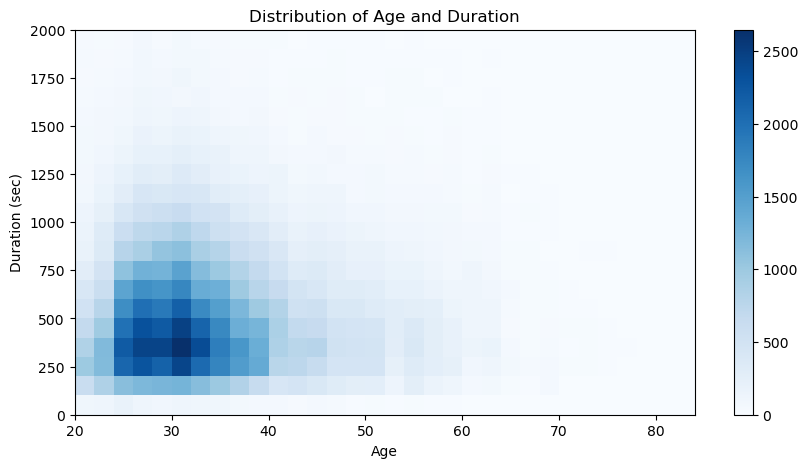

In [20]:
# Draw a heatmap with member_age as the x-axis and duration_sec as the y-axis.
plt.figure(figsize=(10, 5))
bins_x = np.arange(20, 80+5, 2)
bins_y = np.arange(0, 2000+100, 100)
plt.hist2d(data=bike_rental, x='member_age', y='duration_sec', bins=[bins_x, bins_y], cmap='Blues')
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('Duration (sec)')
plt.title('Distribution of Age and Duration')
plt.show()

People in their late 20s and early 30s are most likely to ride between 250 and 500 seconds.

### Relationship of duration_sec with categorical data
#### Boxplot

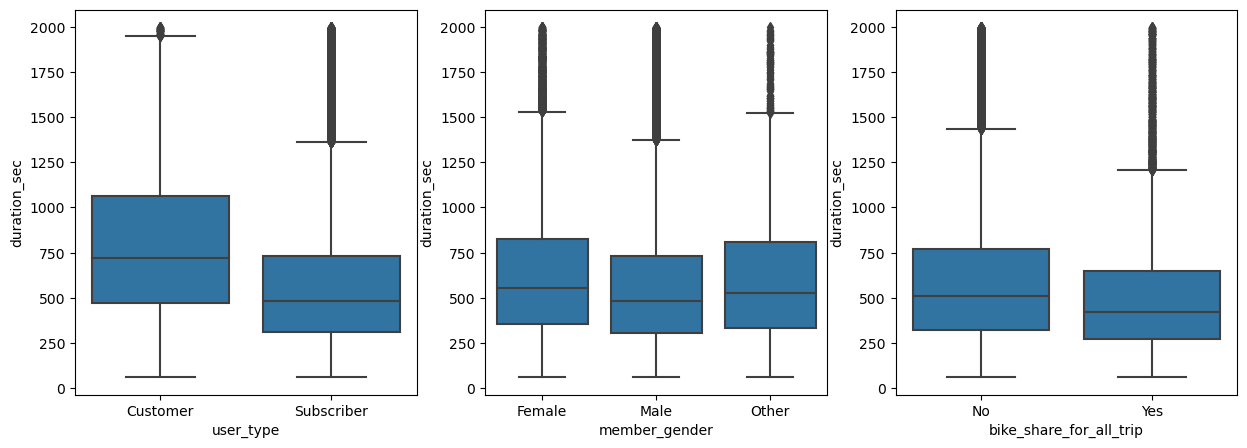

In [21]:
# Plot the relationship between the categorical feature columns and duration_sec in a boxplot. (Row 1, Column 3)
# Exclude data with a value of duration_sec greater than 2000 seconds.
plt.figure(figsize=(15, 5))
for i in range(len(category_cols)):
    plt.subplot(1, 3, i+1)
    sb.boxplot(data=bike_rental[bike_rental['duration_sec'] < 2000], x=category_cols[i], y='duration_sec', color=sb.color_palette()[0])
plt.show()

We found that Customers spend more time cycling than Subscribers. 

Women and other genders are biking longer than men. 

We also found that people with a bike_share_for_all_trip of No are biking longer than those with a bike_share_for_all_trip of Yes.

#### Violin Plot
Let's also look at the distribution with a violin plot.

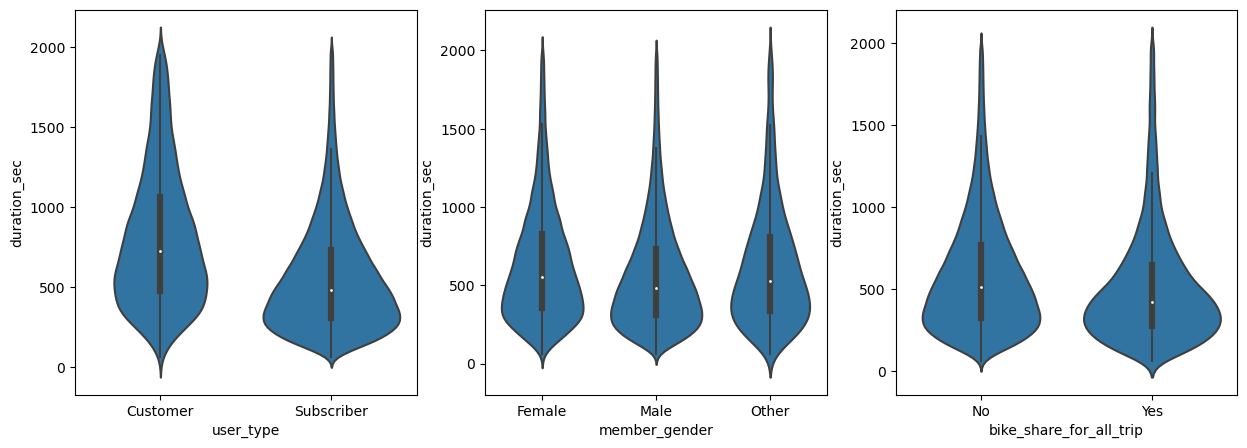

In [22]:
# Plot the relationship between the categorical feature column and duration_sec in a violin plot. (Row 1, Column 3)
# Exclude data with values of duration_sec greater than 2000 seconds.
plt.figure(figsize=(15, 5))
for i in range(len(category_cols)):
    plt.subplot(1, 3, i+1)
    sb.violinplot(data=bike_rental[bike_rental['duration_sec'] < 2000], x=category_cols[i], y='duration_sec', color=sb.color_palette()[0])
plt.show()

We can see the distribution, but the conclusion is actually the same as in the previous boxplot.

Next, we'll plot a boxplot that clusters each of our categorical data.

#### Clustering Boxplot

<AxesSubplot:xlabel='bike_share_for_all_trip', ylabel='count'>

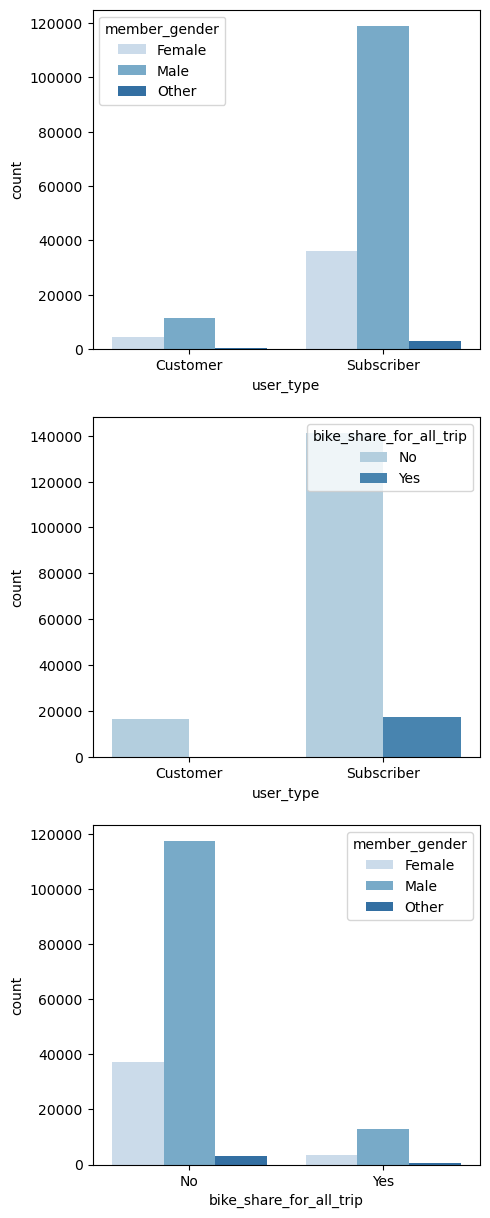

In [23]:
# Plot the relationships of the categorical feature columns together in a countplot: (3 rows, 1 column)
# Column 1 - Set gender to hue in countplot on user_type.
plt.figure(figsize=(5, 15))
plt.subplot(3, 1, 1)
sb.countplot(data=bike_rental, x='user_type', hue='member_gender', palette='Blues')
# Column 2 - In countplot for user_type, set bike_share_for_all_trip to hue. Move the legend to the left.
plt.subplot(3, 1, 2)
sb.countplot(data=bike_rental, x='user_type', hue='bike_share_for_all_trip', palette='Blues')
# Column 3 - In countplot for bike_share_for_all_trip, set member_gender to hue.
plt.subplot(3, 1, 3)
sb.countplot(data=bike_rental, x='bike_share_for_all_trip', hue='member_gender', palette='Blues')


Subscribers outnumber Customers, where men outnumber women.

There are significantly more people with No bike_share_for_all_trip than those with Yes.

**To summarize what we've seen in Bivoriate Exploration:**
- Numerical and categorical data exist together. 
- Numeric data: duration_sec, member_age, start_hour
- Categorical data: user_type, member_gender, bike_share_for_all_trip

- member_age : Members in their late 20s and early 30s are very prominent, with rides lasting between 250 and 500 seconds.
- start_hour : There are many people who ride bikes for 250~500 seconds around 08:00 and 17:00.

- user_type : We see that Customers spend more time cycling than Subscribers.
- member_gender : We found that women and other genders are biking longer than men.
- bike_share_for_all_trip : We found that people with bike_share_for_all_trip of No are biking longer than people with bike_share_for_all_trip of Yes.

## Multivariate Exploration

### 1. Relationship between duration_sec and start_hour and user_type
As we observed in the scatterplot and heatmap above, the scatterplot was too overlapping to observe, so let's draw a heatmap to observe.

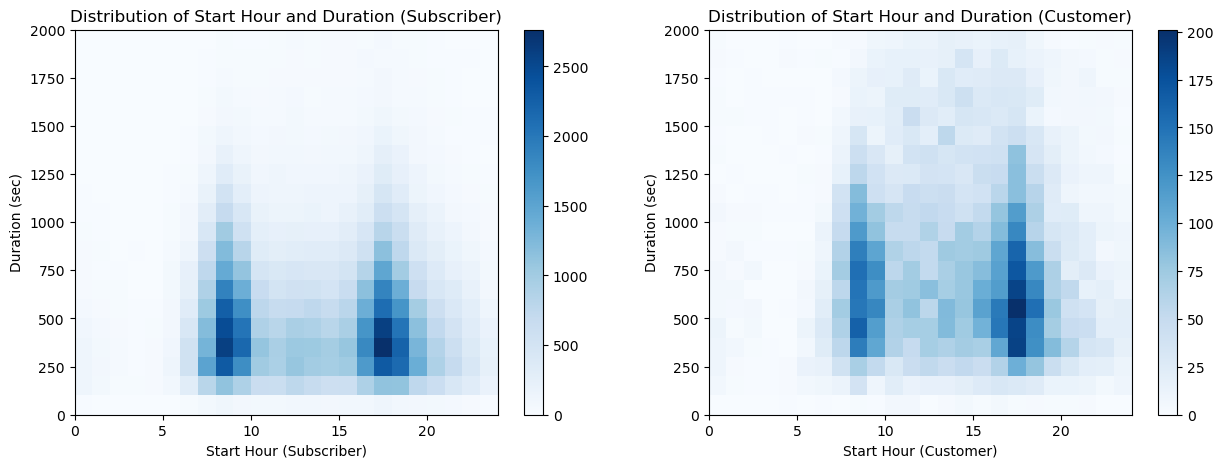

In [24]:
# Draw 2 heatmaps based on user_type (1 row, 2 columns)
# Draw a heatmap with start_hour as the x-axis and duration_sec as the y-axis, and divide the heatmap into 'Subscriber' and 'Customer' based on the count of user_type.
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
bins_x = np.arange(0, 24+1, 1)
bins_y = np.arange(0, 2000+100, 100)
plt.hist2d(data=bike_rental[bike_rental['user_type'] == 'Subscriber'], x='start_hour', y='duration_sec', bins=[bins_x, bins_y], cmap='Blues')
plt.colorbar()
plt.xlabel('Start Hour (Subscriber)')
plt.ylabel('Duration (sec)')
plt.title('Distribution of Start Hour and Duration (Subscriber)')
plt.subplot(1, 2, 2)
plt.hist2d(data=bike_rental[bike_rental['user_type'] == 'Customer'], x='start_hour', y='duration_sec', bins=[bins_x, bins_y], cmap='Blues')
plt.colorbar()
plt.xlabel('Start Hour (Customer)')
plt.ylabel('Duration (sec)')
plt.title('Distribution of Start Hour and Duration (Customer)')
plt.show()

It appears that Subscribers ride their bikes more regularly around 08:00 and 17:00 than Customers. Of course, in absolute terms, Subscribers are more frequent. However, on a relative basis, Customer is less focused on specific times.

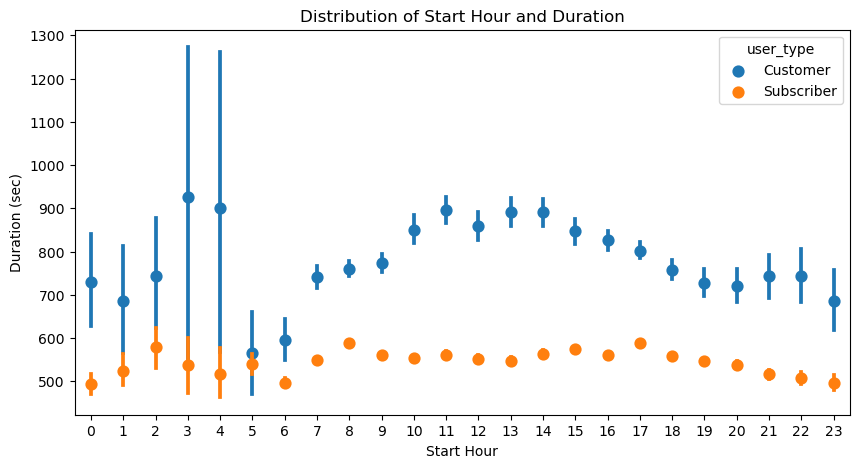

In [25]:
# Plot a pointplot with the same variables, excluding data with a value of duration_sec greater than 2000 seconds.
plt.figure(figsize=(10, 5))
sb.pointplot(data=bike_rental[bike_rental['duration_sec'] < 2000], x='start_hour', y='duration_sec', hue='user_type', linestyles='')
plt.xlabel('Start Hour')
plt.ylabel('Duration (sec)')
plt.title('Distribution of Start Hour and Duration')
plt.show()

Customers spend more time cycling than Subscribers across all time zones. Although the margin of error is large, customers seem to spend the most time cycling in the early morning hours before sunrise and around noon.

### 2. Relationship between duration_sec and start_hour and member_gender

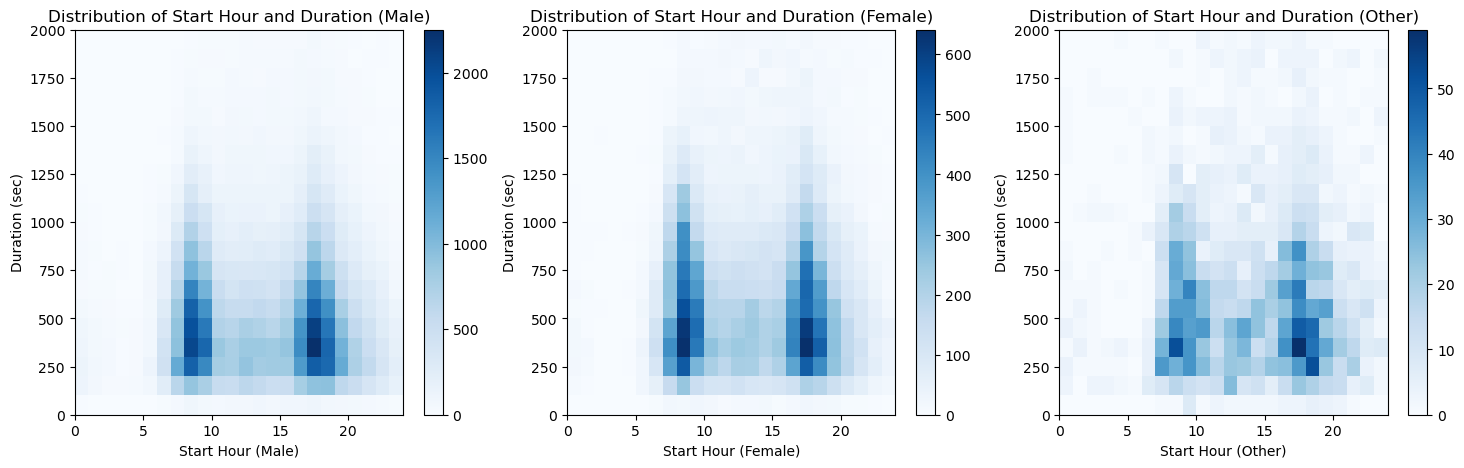

In [26]:
# Draw two heatmaps based on user_type (1 row, 3 columns)
# Plot a heatmap with start_hour as the x-axis and duration_sec as the y-axis, and divide the heatmap into 'Male', 'Female', and 'Other' based on the count of member_gender.
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
bins_x = np.arange(0, 24+1, 1)
bins_y = np.arange(0, 2000+100, 100)
plt.hist2d(data=bike_rental[bike_rental['member_gender'] == 'Male'], x='start_hour', y='duration_sec', bins=[bins_x, bins_y], cmap='Blues')
plt.colorbar()
plt.xlabel('Start Hour (Male)')
plt.ylabel('Duration (sec)')
plt.title('Distribution of Start Hour and Duration (Male)')
plt.subplot(1, 3, 2)
plt.hist2d(data=bike_rental[bike_rental['member_gender'] == 'Female'], x='start_hour', y='duration_sec', bins=[bins_x, bins_y], cmap='Blues')
plt.colorbar()
plt.xlabel('Start Hour (Female)')
plt.ylabel('Duration (sec)')
plt.title('Distribution of Start Hour and Duration (Female)')
plt.subplot(1, 3, 3)
plt.hist2d(data=bike_rental[bike_rental['member_gender'] == 'Other'], x='start_hour', y='duration_sec', bins=[bins_x, bins_y], cmap='Blues')
plt.colorbar()
plt.xlabel('Start Hour (Other)')
plt.ylabel('Duration (sec)')
plt.title('Distribution of Start Hour and Duration (Other)')
plt.show()

Based on the information from the bivariate graph, we observe that females spend more time cycling than males. The degree of concentration at any given time seems similar. The Other group appears to be less concentrated, but this may be due to the small amount of data.

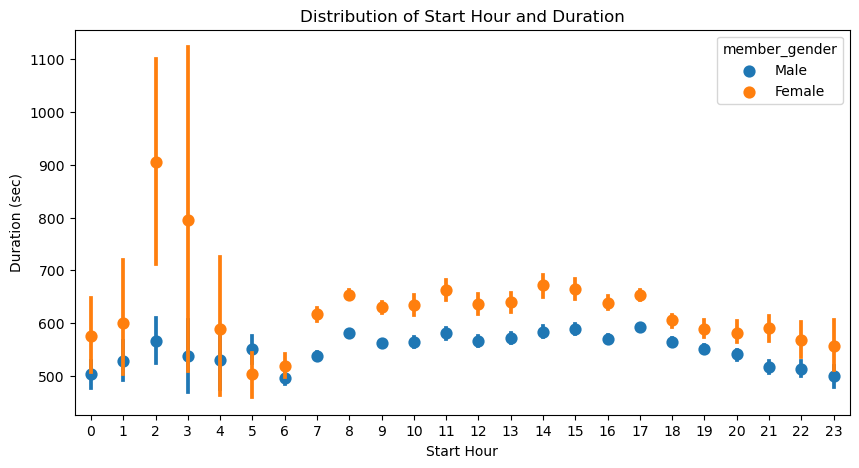

In [27]:
# The graph becomes too messy, so we exclude Other and redraw it.
plt.figure(figsize=(10, 5))
sb.pointplot(data=bike_rental[(bike_rental['duration_sec'] < 2000) & (bike_rental['member_gender'] != 'Other')], x='start_hour', y='duration_sec', hue='member_gender', hue_order=['Male', 'Female'], linestyles='')
plt.xlabel('Start Hour')
plt.ylabel('Duration (sec)')
plt.title('Distribution of Start Hour and Duration')
plt.show()

Women bike for longer periods of time than men across all time zones, with the longest periods of cycling occurring in the early morning hours.

### 3. Relationship between duration_sec and member_age and user_type

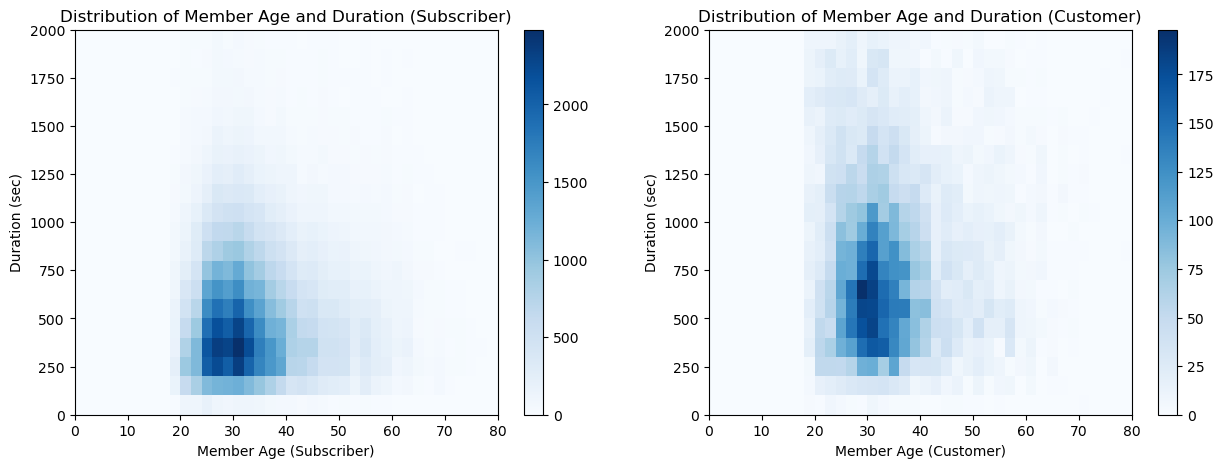

In [28]:
# Proceed similarly.
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
bins_x = np.arange(0, 80+1, 2)
bins_y = np.arange(0, 2000+100, 100)
plt.hist2d(data=bike_rental[bike_rental['user_type'] == 'Subscriber'], x='member_age', y='duration_sec', bins=[bins_x, bins_y], cmap='Blues')
plt.colorbar()
plt.xlabel('Member Age (Subscriber)')
plt.ylabel('Duration (sec)')
plt.title('Distribution of Member Age and Duration (Subscriber)')
plt.subplot(1, 2, 2)
plt.hist2d(data=bike_rental[bike_rental['user_type'] == 'Customer'], x='member_age', y='duration_sec', bins=[bins_x, bins_y], cmap='Blues')
plt.colorbar()
plt.xlabel('Member Age (Customer)')
plt.ylabel('Duration (sec)')
plt.title('Distribution of Member Age and Duration (Customer)')
plt.show()

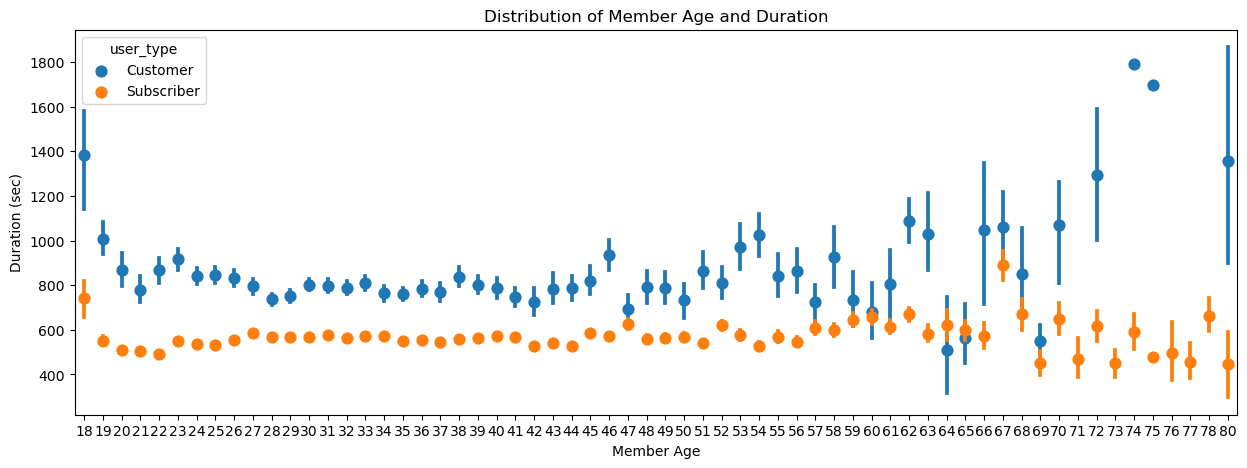

In [29]:
plt.figure(figsize=(15, 5))
sb.pointplot(data=bike_rental[(bike_rental['duration_sec'] < 2000) & (bike_rental['member_age'] < 81)], x='member_age', y='duration_sec', hue='user_type', linestyles='')
plt.xlabel('Member Age')
plt.ylabel('Duration (sec)')
plt.title('Distribution of Member Age and Duration')
plt.show()

As mentioned earlier, the most popular age group is the late 20s to early 30s. Customers seem to ride longer than Subscribers across all age groups, with a notable dip in usage for those under 20, and an average increase for older age groups, but the data is small and hard to trust.

### 4. Relationship between duration_sec and meber_age and member_gender

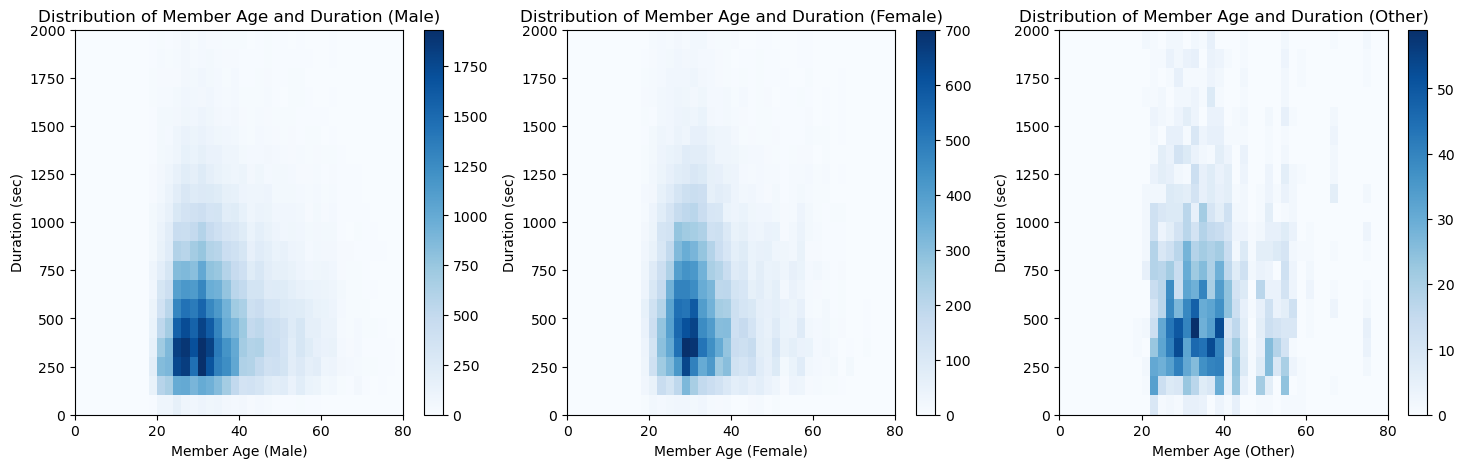

In [30]:
# Proceed similarly.
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
bins_x = np.arange(0, 80+1, 2)
bins_y = np.arange(0, 2000+100, 100)
plt.hist2d(data=bike_rental[bike_rental['member_gender'] == 'Male'], x='member_age', y='duration_sec', bins=[bins_x, bins_y], cmap='Blues')
plt.colorbar()
plt.xlabel('Member Age (Male)')
plt.ylabel('Duration (sec)')
plt.title('Distribution of Member Age and Duration (Male)')
plt.subplot(1, 3, 2)
plt.hist2d(data=bike_rental[bike_rental['member_gender'] == 'Female'], x='member_age', y='duration_sec', bins=[bins_x, bins_y], cmap='Blues')
plt.colorbar()
plt.xlabel('Member Age (Female)')
plt.ylabel('Duration (sec)')
plt.title('Distribution of Member Age and Duration (Female)')
plt.subplot(1, 3, 3)
plt.hist2d(data=bike_rental[bike_rental['member_gender'] == 'Other'], x='member_age', y='duration_sec', bins=[bins_x, bins_y], cmap='Blues')
plt.colorbar()
plt.xlabel('Member Age (Other)')
plt.ylabel('Duration (sec)')
plt.title('Distribution of Member Age and Duration (Other)')
plt.show()

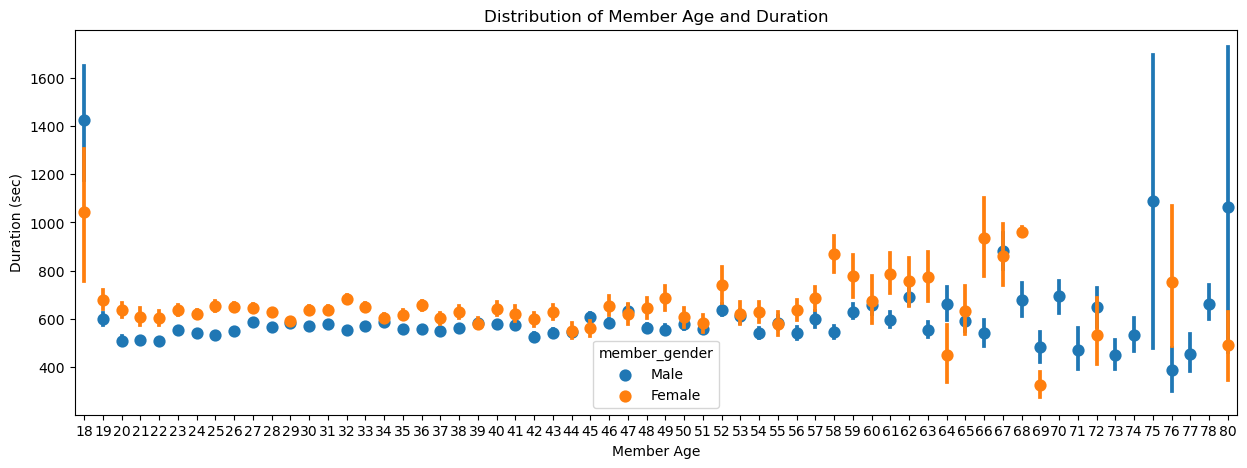

In [31]:
plt.figure(figsize=(15, 5))
sb.pointplot(data=bike_rental[(bike_rental['duration_sec'] < 2000) & (bike_rental['member_gender'] != 'Other') & (bike_rental['member_age'] < 81)], x='member_age', y='duration_sec', hue='member_gender', hue_order=['Male', 'Female'], linestyles='')
plt.xlabel('Member Age')
plt.ylabel('Duration (sec)')
plt.title('Distribution of Member Age and Duration')
plt.show()

If we exclude Other and Seniors, which have less data, we don't see much of a difference in time spent across all age groups. While females spend more time in most bands, males spend more time at age 18. And while males are evenly distributed from their late 20s to early 30s, females are more concentrated around the feminine side of the spectrum.

**Here's what we found with our multivariate explorations.**

The multivariate exploration mostly reiterated the observations we made earlier, but we were able to make a few observations in the details.
1. Customers are less concentrated at 08:00 and 17:00 than Subscribers, and have significantly longer hours at dawn and noon.
2. Females ride longer than males across all time zones, with a significant difference in the early morning hours.
3. Customers spend more time in all age groups, especially those under 20.
4. Females spend more time in almost all age groups, but the difference is marginal, with the exception of 18-year-olds, where the difference is much larger, and females are more concentrated around age 30 than males.

<a id='Conclusions'></a>

## **Conclusions**
Each visualization and analysis did not reveal any significant correlation between the numerical data, but by looking at the distribution of each data, I was able to identify facts and trends, and I was able to make some detailed discoveries.

I also gained some insights into the analysis process. 
1. we went from univariate to bivariate to multivariate exploration, but the main idea remained the same.
2. It is difficult to make a completely new discovery just by doing multivariate analysis.
3. When performing multiple multivariate visualizations, the axes and points represented can easily become confusing.
4. When conducting multivariate visualizations, it is recommended to clarify the axes and points and to keep the presentation as simple as possible.
5. If you have detailed findings from your multivariate visualization, you may need to re-edit your presentation to make these detailed points stand out to the audience for PT or suggestions.